In [54]:
import glob
import os
import math
from decimal import Decimal
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import matplotlib.colors
import matplotlib.cm
import pandas as pd
import numpy as np
import time

path = '/shared/storage/physnp/ahs539/Nugrid/SWJ_nuppn_boundary_fix/frames/ppn/M15_CE_full_iniabs/early_phase_non_int_full_iniab_nov_25/f1a5mcr1.5md2e-5/N_Traj_rmin=1.0422E+06/'



In [ ]:
target = ['time','HE  3','C  12'] # INCLUDE ISOTOPES IN ORDER OF APPERANCE IN X-TIME.DAT
                                  # TIME MUST BE INCLUDED AT THE BEGINNING OF THE LIST 

with open(path + "x-time.dat", "r") as f:
    header = f.readline().strip()

columns = header.split('|')
position = []
for j in target:
    index_pos = next((i for i, col in enumerate(columns) if j in col), None)
    position.append((index_pos - 1))
isotope_mf = pd.read_csv(path + 'x-time.dat',
    skiprows = 0, header = 1, sep='  ',
    usecols = position, dtype='float')
isotope_mf.columns = target

Columns: ['#', 'cycle ', 'time         ', 't9     ', 'rho         ', '1-sum(yps)  ', 'ye         ', '   7-NEUT   ', '   8-PROT   ', '   9-H   2  ', '  10-HE  3  ', '  11-HE  4  ', '  12-BE  7  ', '  13-B   8  ', '  14-LI  7  ', '  15-C  11  ', '  16-B  11  ', '  17-C  12  ', '  18-C  13  ', '  19-N  13  ', '  20-N  14  ', '  21-C  14  ', '  22-N  15  ', '  23-O  16  ', '  24-O  17  ', '  25-O  18  ', '  26-F  17  ', '  27-F  18  ', '  28-F  19  ', '  29-NE 20  ', '  30-NE 21  ', '  31-NE 22  ', '  32-NA 22  ', '  33-NA 23  ', '  34-MG 23  ', '  35-MG 24  ', '  36-MG 25  ', '  37-MG 26  ', '  38-AL 26  ', '  39-AL 27  ', '  40-SI 27  ', '  41-SI 28  ', '  42-SI 29  ', '  43-SI 30  ', '  44-P  31  ', '  45-S  31  ', '  46-BE  8  ', '  47-O  14  ', '  48-O  15  ', '  49-NA 21  ', '  50-AL 25  ', '  51-P  29  ', '  52-P  30  ', '  53-PB206  ', '  54-PB207  ', '  55-BI211  ', '  56-PO210  ', '  57-H   3  ', '  58-HE  6  ', '  59-LI  8  ', '  60-LI  9  ', '  61-BE 10  ', '  62-BE 11  ', '  6

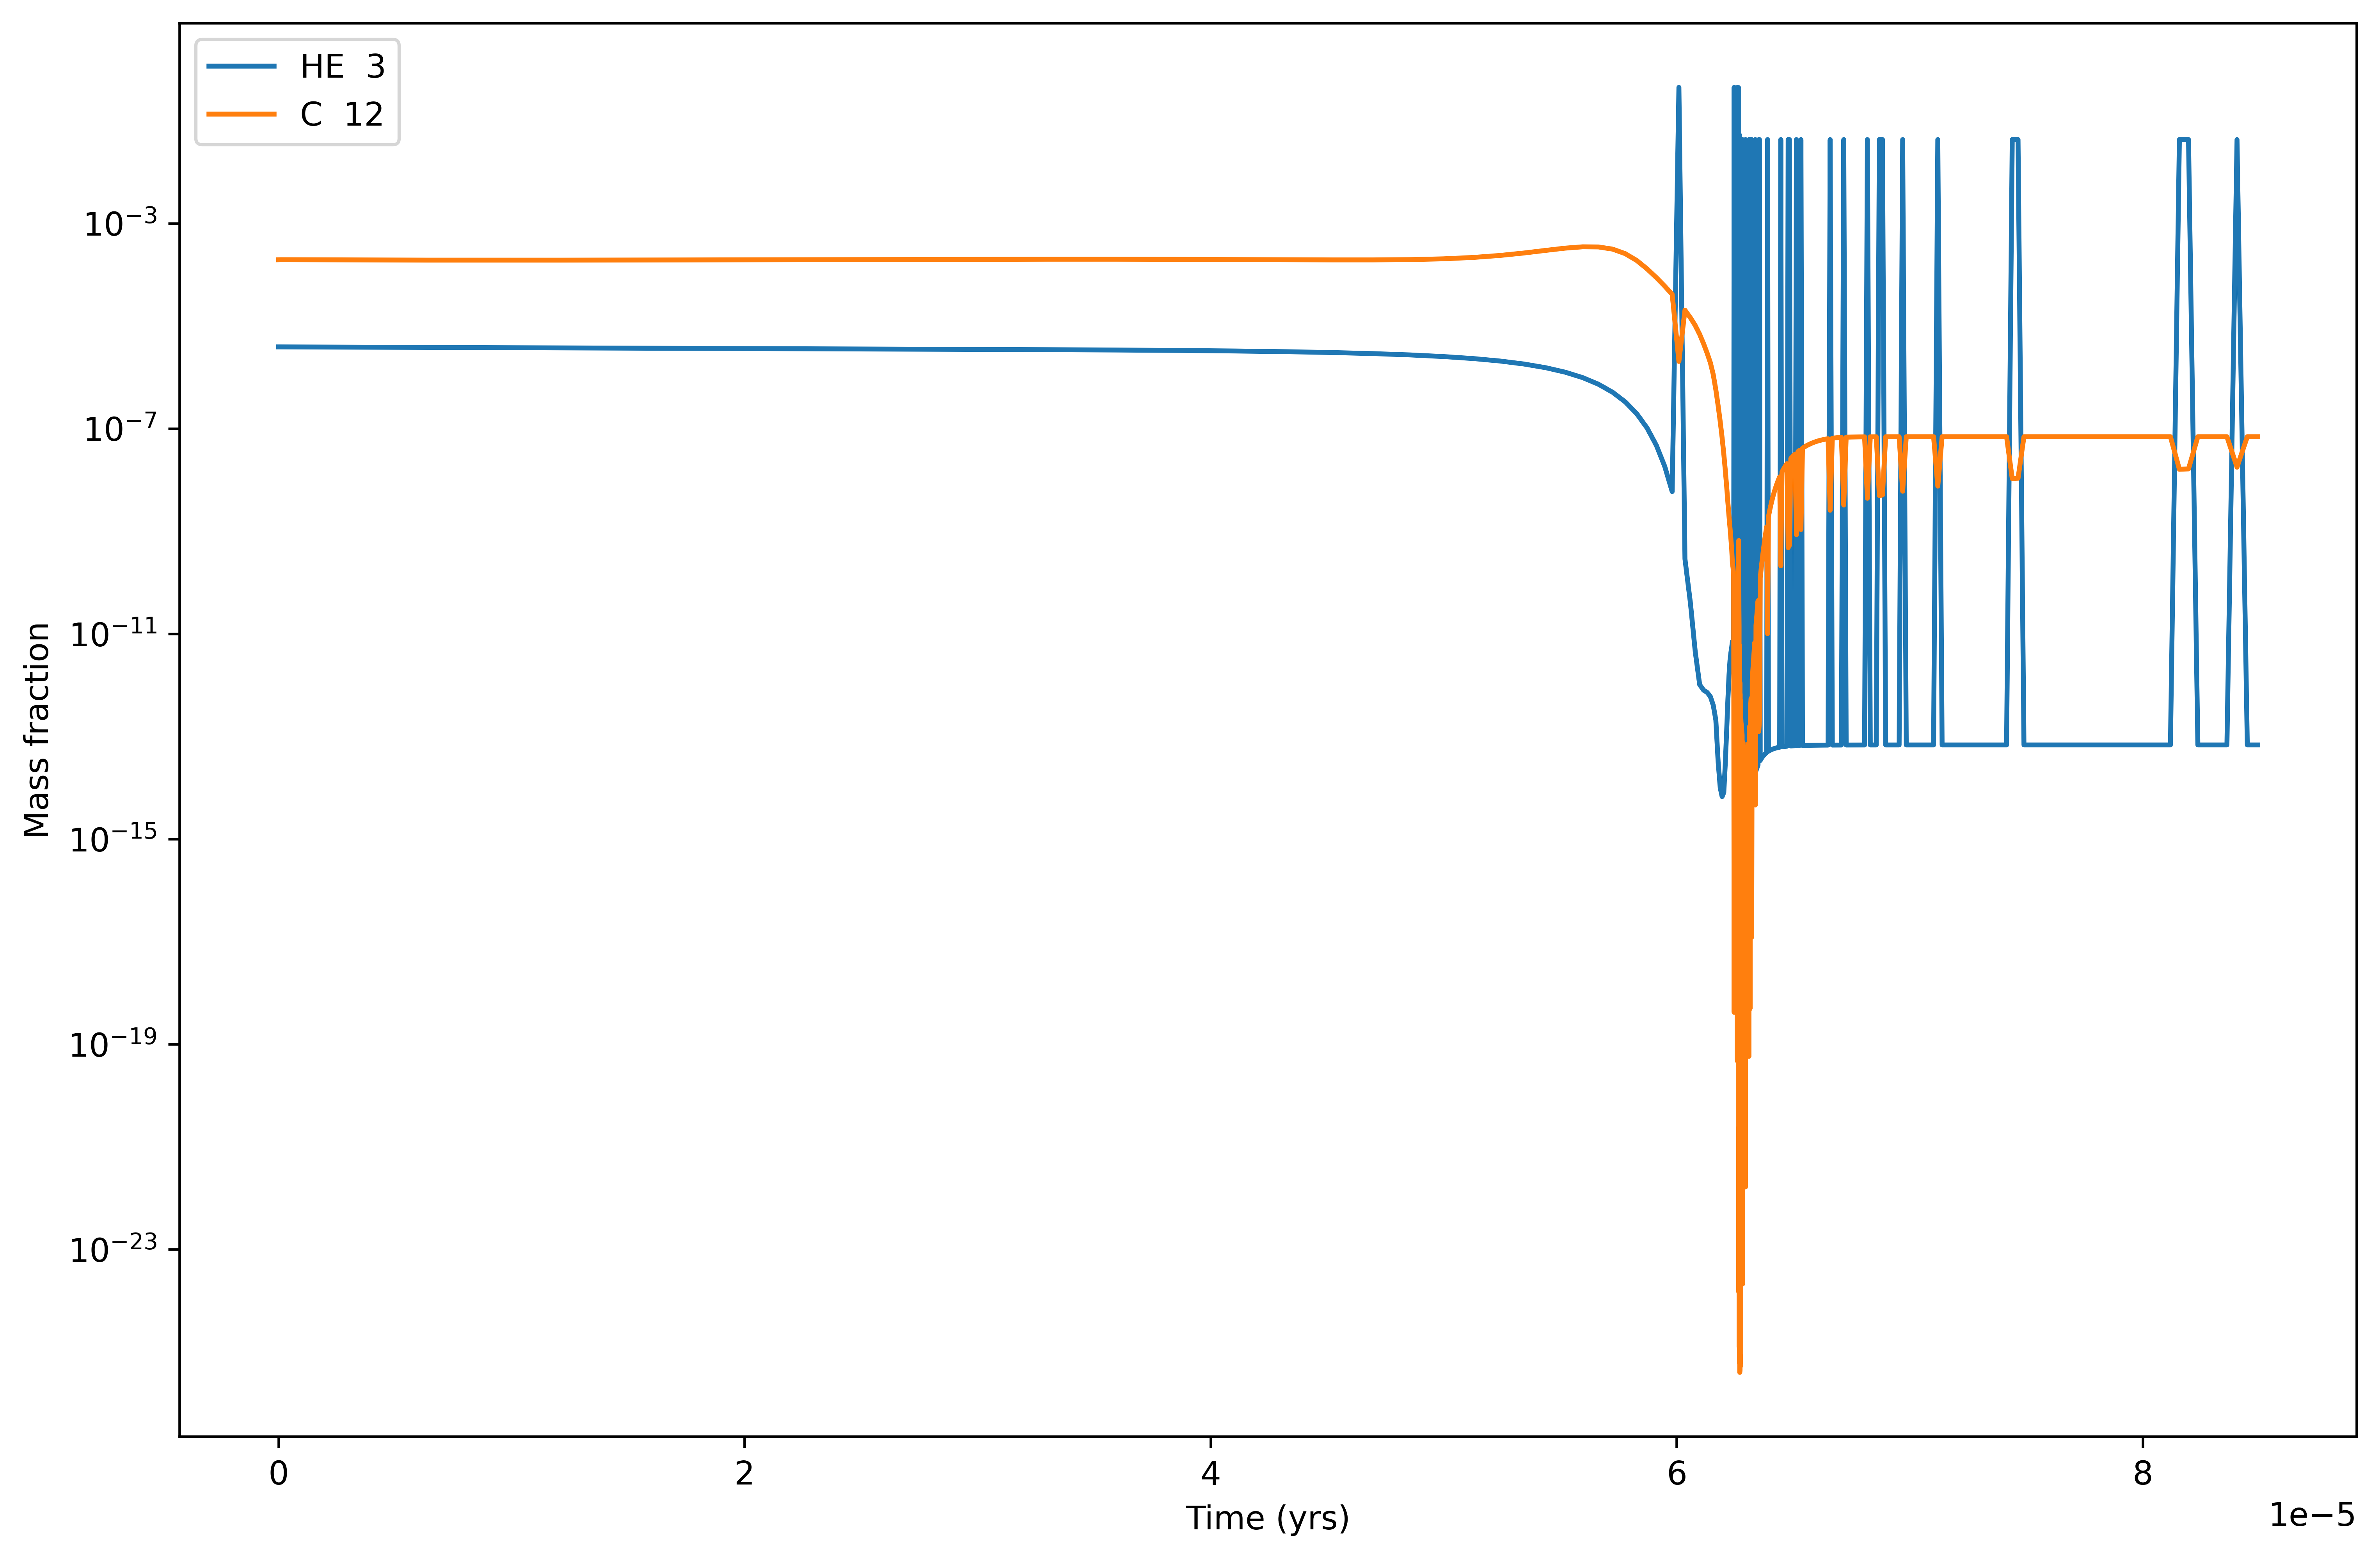

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi =600)
for i in target:
    if i != "time":
        axs.plot(isotope_mf["time"], isotope_mf[str(i)], label = str(i))
        
axs.set_xlabel('Time (yrs)')
axs.set_ylabel('Mass fraction')
axs.legend()
axs.set_yscale('log')